<a href="https://colab.research.google.com/github/saptarshimazumdar/deep-learning-concepts/blob/main/generic/least-square-variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n = 50
sigma = 0.3
x_true = np.linspace(0, 2 * np.pi, 500)
y_true = np.sin(x_true)

x_train = np.random.uniform(0, 2 * np.pi, n)
noise = np.random.normal(0, sigma, n)
y_train = np.sin(x_train) + noise

x_test = np.random.uniform(0, 2 * np.pi, 100)
y_test = np.sin(x_test) + np.random.normal(0, sigma, 100)

#### **Defining Least Square Theorem from scratch**

In [3]:
def least_square(_X_train, _y_train):
  # Calculate (X^T * X)^-1 * X^T * y
  _XT_X_inv = np.linalg.inv(_X_train.T @ _X_train)
  beta = _XT_X_inv @ _X_train.T @ _y_train
  return beta

#### **Polynomial Generation**

In [4]:
def create_polynomial_weights(single_column, degree):
  return np.vstack([single_column ** power for power in range(degree, -1, -1)]).T

### **Linear Hypothesis**

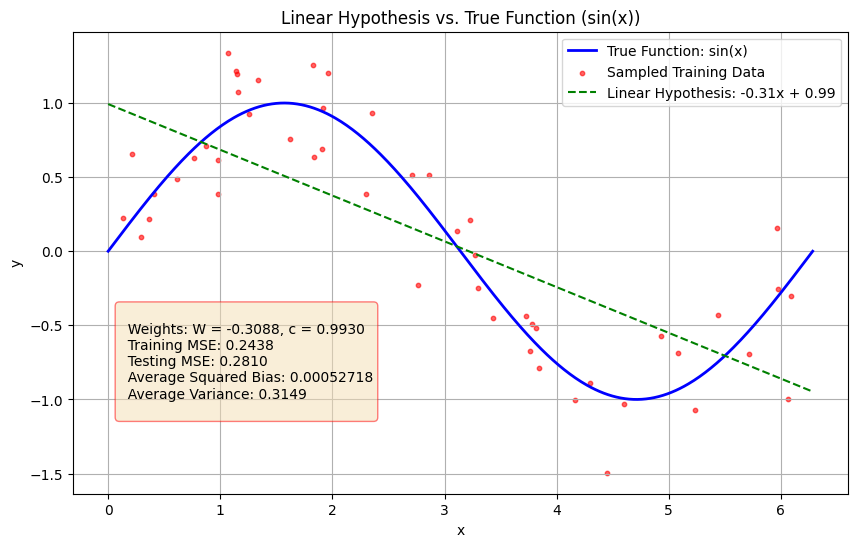

In [5]:
# X_matrix = [[x1, 1], [x2, 1], ...]
X_train = np.vstack([x_train, np.ones(len(x_train))]).T
# W, c = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
W, c = least_square(X_train, y_train)

y_pred_train = W * x_train + c
y_pred_test = W * x_test + c
y_pred_line = W * x_true + c

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

# Bias(x) = E[f_hat(x)] - sin(x)
bias = np.mean(y_pred_line - y_true)

# Var(x) = E[ (f_hat(x) - E[f_hat(x)])^2 ]
variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)


# -----Plotting------
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function: sin(x)', color='blue', linewidth=2)
plt.scatter(x_train, y_train, color='red', alpha=0.6, s=10, label='Sampled Training Data')
plt.plot(x_true, y_pred_line, label=f'Linear Hypothesis: {W:.2f}x + {c:.2f}', color='green', linestyle='--')
plt.title('Linear Hypothesis vs. True Function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0.1, -1.1, f"""
  Weights: W = {W:.4f}, c = {c:.4f}
  Training MSE: {train_mse:.4f}
  Testing MSE: {test_mse:.4f}
  Average Squared Bias: {(bias ** 2):.8f}
  Average Variance: {variance:.4f}
""", bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='red'))
plt.show()

**Changing W=1, c=0**

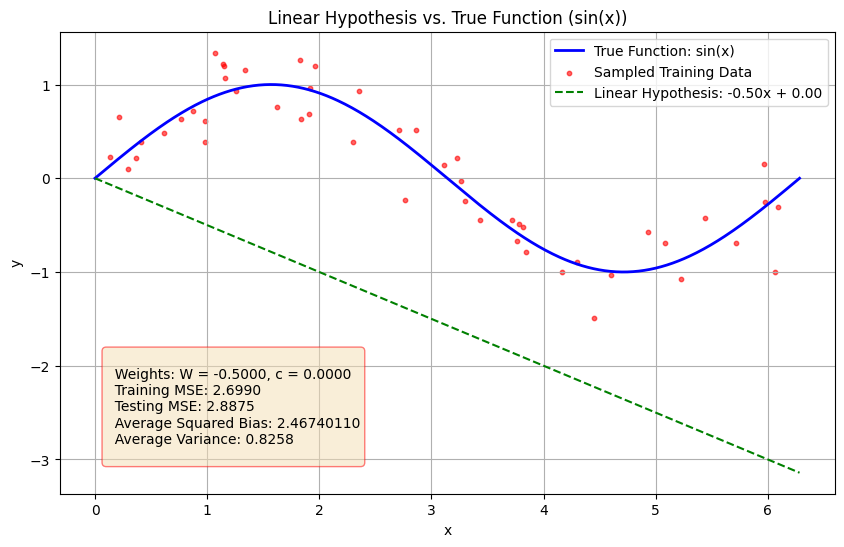

In [6]:
W, c = (-0.5, 0)

y_pred_train = W * x_train + c
y_pred_test = W * x_test + c
y_pred_line = W * x_true + c

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

# Bias(x) = E[f_hat(x)] - sin(x)
bias = np.mean(y_pred_line - y_true)

# Var(x) = E[ (f_hat(x) - E[f_hat(x)])^2 ]
variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)


# -----Plotting------
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function: sin(x)', color='blue', linewidth=2)
plt.scatter(x_train, y_train, color='red', alpha=0.6, s=10, label='Sampled Training Data')
plt.plot(x_true, y_pred_line, label=f'Linear Hypothesis: {W:.2f}x + {c:.2f}', color='green', linestyle='--')
plt.title('Linear Hypothesis vs. True Function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0.1, -3, f"""
  Weights: W = {W:.4f}, c = {c:.4f}
  Training MSE: {train_mse:.4f}
  Testing MSE: {test_mse:.4f}
  Average Squared Bias: {(bias ** 2):.8f}
  Average Variance: {variance:.4f}
""", bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='red'))
plt.show()

**Observations on Bias and Variance**

* **Bias:** The error remains high even with infinite data because the model class (linear) cannot represent the target function (sine).

* **Variance:** Even if I re-run the code with a different `random.seed`, the green line will barely move. This indicates low variance.

### **Polynomial Hypothesis**
Using [Vandermonde Matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)

This creates columns: $[x^3, x^2, x^1, 1]$

### **$d^3$**

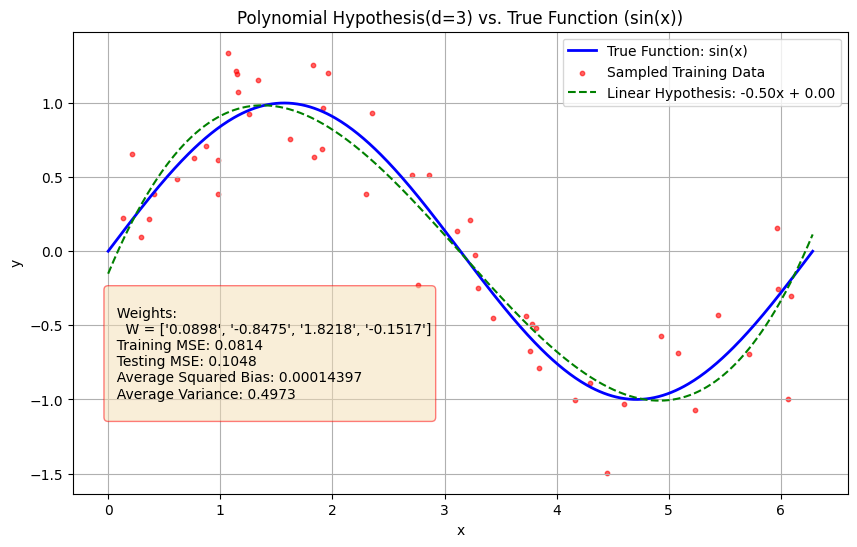

In [7]:
degree = 3
X_poly = np.vander(x_train, degree + 1)

weights = least_square(X_poly, y_train)

y_pred_train = np.vander(x_train, degree + 1) @ weights
y_pred_test = np.vander(x_test, degree + 1) @ weights
y_pred_line = np.vander(x_true, degree + 1) @ weights

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

# Bias(x) = E[f_hat(x)] - sin(x)
bias = np.mean(y_pred_line - y_true)

# Var(x) = E[ (f_hat(x) - E[f_hat(x)])^2 ]
variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)


# -----Plotting------
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function: sin(x)', color='blue', linewidth=2)
plt.scatter(x_train, y_train, color='red', alpha=0.6, s=10, label='Sampled Training Data')
plt.plot(x_true, y_pred_line, label=f'Linear Hypothesis: {W:.2f}x + {c:.2f}', color='green', linestyle='--')
plt.title(f'Polynomial Hypothesis(d={degree}) vs. True Function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0, -1.1, f"""
  Weights:
    W = {[f"{weight:.4f}" for weight in weights]}
  Training MSE: {train_mse:.4f}
  Testing MSE: {test_mse:.4f}
  Average Squared Bias: {(bias ** 2):.8f}
  Average Variance: {variance:.4f}
""", bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='red'))
plt.show()

Using manual polynomial

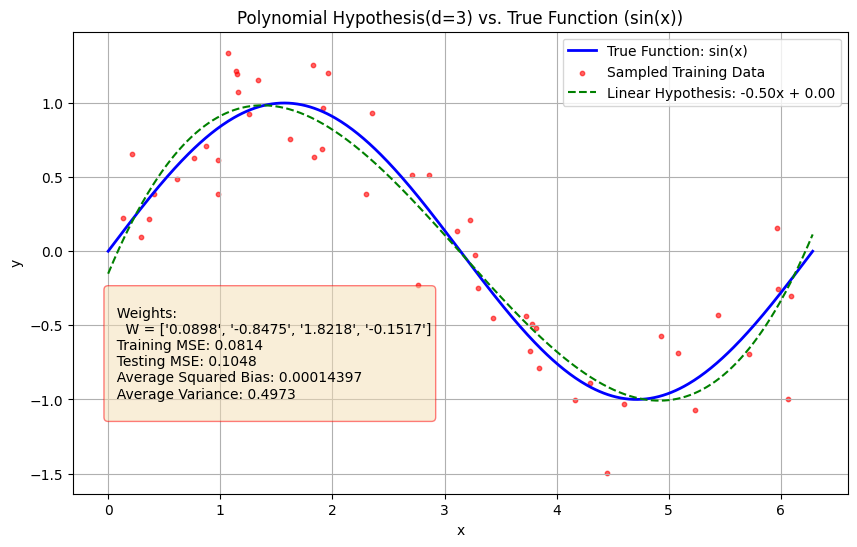

In [8]:
degree = 3
X_poly = create_polynomial_weights(x_train, degree)

weights = least_square(X_poly, y_train)

y_pred_train = create_polynomial_weights(x_train, degree) @ weights
y_pred_test = create_polynomial_weights(x_test, degree) @ weights
y_pred_line = create_polynomial_weights(x_true, degree) @ weights

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

# Bias(x) = E[f_hat(x)] - sin(x)
bias = np.mean(y_pred_line - y_true)

# Var(x) = E[ (f_hat(x) - E[f_hat(x)])^2 ]
variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)


# -----Plotting------
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function: sin(x)', color='blue', linewidth=2)
plt.scatter(x_train, y_train, color='red', alpha=0.6, s=10, label='Sampled Training Data')
plt.plot(x_true, y_pred_line, label=f'Linear Hypothesis: {W:.2f}x + {c:.2f}', color='green', linestyle='--')
plt.title(f'Polynomial Hypothesis(d={degree}) vs. True Function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0, -1.1, f"""
  Weights:
    W = {[f"{weight:.4f}" for weight in weights]}
  Training MSE: {train_mse:.4f}
  Testing MSE: {test_mse:.4f}
  Average Squared Bias: {(bias ** 2):.8f}
  Average Variance: {variance:.4f}
""", bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='red'))
plt.show()

### **$d^5$**

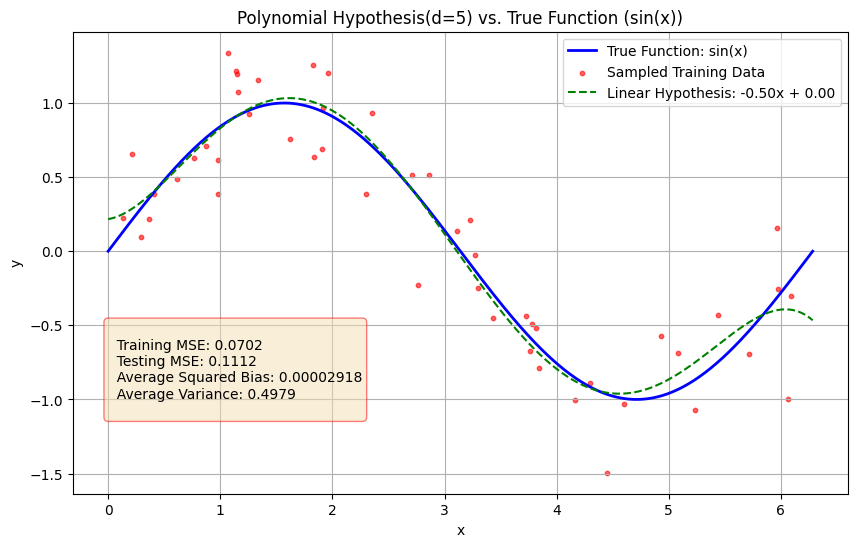

In [9]:
degree = 5
X_poly = create_polynomial_weights(x_train, degree)

weights = least_square(X_poly, y_train)

y_pred_train = create_polynomial_weights(x_train, degree) @ weights
y_pred_test = create_polynomial_weights(x_test, degree) @ weights
y_pred_line = create_polynomial_weights(x_true, degree) @ weights

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

# Bias(x) = E[f_hat(x)] - sin(x)
bias = np.mean(y_pred_line - y_true)

# Var(x) = E[ (f_hat(x) - E[f_hat(x)])^2 ]
variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)


# -----Plotting------
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function: sin(x)', color='blue', linewidth=2)
plt.scatter(x_train, y_train, color='red', alpha=0.6, s=10, label='Sampled Training Data')
plt.plot(x_true, y_pred_line, label=f'Linear Hypothesis: {W:.2f}x + {c:.2f}', color='green', linestyle='--')
plt.title(f'Polynomial Hypothesis(d={degree}) vs. True Function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0, -1.1, f"""
  Training MSE: {train_mse:.4f}
  Testing MSE: {test_mse:.4f}
  Average Squared Bias: {(bias ** 2):.8f}
  Average Variance: {variance:.4f}
""", bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='red'))
plt.show()

### **d^10**

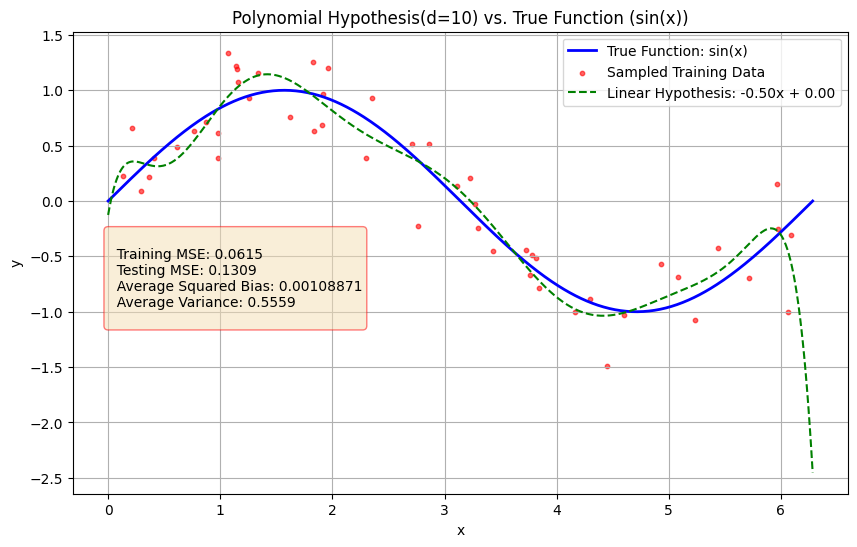

In [10]:
degree = 10
X_poly = create_polynomial_weights(x_train, degree)

weights = least_square(X_poly, y_train)

y_pred_train = create_polynomial_weights(x_train, degree) @ weights
y_pred_test = create_polynomial_weights(x_test, degree) @ weights
y_pred_line = create_polynomial_weights(x_true, degree) @ weights

train_mse = np.mean((y_train - y_pred_train)**2)
test_mse = np.mean((y_test - y_pred_test)**2)

# Bias(x) = E[f_hat(x)] - sin(x)
bias = np.mean(y_pred_line - y_true)

# Var(x) = E[ (f_hat(x) - E[f_hat(x)])^2 ]
variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)


# -----Plotting------
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Function: sin(x)', color='blue', linewidth=2)
plt.scatter(x_train, y_train, color='red', alpha=0.6, s=10, label='Sampled Training Data')
plt.plot(x_true, y_pred_line, label=f'Linear Hypothesis: {W:.2f}x + {c:.2f}', color='green', linestyle='--')
plt.title(f'Polynomial Hypothesis(d={degree}) vs. True Function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0, -1.1, f"""
  Training MSE: {train_mse:.4f}
  Testing MSE: {test_mse:.4f}
  Average Squared Bias: {(bias ** 2):.8f}
  Average Variance: {variance:.4f}
""", bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='red'))
plt.show()

As the model complexity increases, bias is reducing significantly. But variance is becoming high. The plots shows, hypothesis becoming more inclined towards noise. We can assume that it has started memoizing weights

### **Generalization Behavior**

In [11]:
def fit_transform(seed):
  np.random.seed(seed)
  n = 50
  sigma = 0.3
  x_true = np.linspace(0, 2 * np.pi, 500)
  y_true = np.sin(x_true)

  x_train = np.random.uniform(0, 2 * np.pi, n)
  noise = np.random.normal(0, sigma, n)
  y_train = np.sin(x_train) + noise

  x_test = np.random.uniform(0, 2 * np.pi, 100)
  y_test = np.sin(x_test) + np.random.normal(0, sigma, 100)

  for degree in [3, 5, 10]:

    X_poly = create_polynomial_weights(x_train, degree)
    weights = least_square(X_poly, y_train)

    y_pred_train = create_polynomial_weights(x_train, degree) @ weights
    y_pred_test = create_polynomial_weights(x_test, degree) @ weights
    y_pred_line = create_polynomial_weights(x_true, degree) @ weights

    train_mse = np.mean((y_train - y_pred_train)**2)
    test_mse = np.mean((y_test - y_pred_test)**2)

    bias = np.mean(y_pred_line - y_true) ** 2
    variance = np.mean((y_pred_line - np.mean(y_pred_line))**2, axis=0)
    seed_str = seed if len(str(seed)) == 2 else f'0{seed}'
    print(f"{seed_str} seed sample \tDegree: {degree} "
      +f"\t[Training Loss: {train_mse:.4f}, Testing Loss: {test_mse:.4f}] "
      +f"\t Mean Squared Bias: {bias:.8f} \t Avg Variance: {variance:.4f}")

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

In [12]:
for seed in np.sort(np.random.default_rng().integers(0, 100, size=10)):
  fit_transform(seed)

07 seed sample 	Degree: 3 	[Training Loss: 0.0930, Testing Loss: 0.0765] 	 Mean Squared Bias: 0.00040569 	 Avg Variance: 0.4944
07 seed sample 	Degree: 5 	[Training Loss: 0.0814, Testing Loss: 0.0907] 	 Mean Squared Bias: 0.00014193 	 Avg Variance: 0.4877
07 seed sample 	Degree: 10 	[Training Loss: 0.0769, Testing Loss: 0.1075] 	 Mean Squared Bias: 0.00009796 	 Avg Variance: 0.5338
10 seed sample 	Degree: 3 	[Training Loss: 0.0968, Testing Loss: 0.0783] 	 Mean Squared Bias: 0.00028239 	 Avg Variance: 0.5260
10 seed sample 	Degree: 5 	[Training Loss: 0.0767, Testing Loss: 0.0814] 	 Mean Squared Bias: 0.00065398 	 Avg Variance: 0.5409
10 seed sample 	Degree: 10 	[Training Loss: 0.0628, Testing Loss: 0.0975] 	 Mean Squared Bias: 0.00647654 	 Avg Variance: 0.7070
21 seed sample 	Degree: 3 	[Training Loss: 0.0973, Testing Loss: 0.1081] 	 Mean Squared Bias: 0.00510744 	 Avg Variance: 0.4461
21 seed sample 	Degree: 5 	[Training Loss: 0.0962, Testing Loss: 0.1083] 	 Mean Squared Bias: 0.004173

From the observation above, higher degree polynomial approximation shows a wide range of avg variance calculation for change in randomness, while for lower degree polynomials, the variation is relatively less